# Time Series Modeling: Spain Energy Data

## Prepare Notebook

**Read in libraries**

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

**Set Notebook Preferences**

In [103]:
#Set Pandas preferenes
pd.options.display.max_rows = 100

#Set style for matplotlib
plt.style.use('ggplot')

#Surpress annoying warnings
warnings.filterwarnings('ignore')

**Read in data**

In [104]:
#Set path to data
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Read in training and test data
X_train = pd.read_csv(path + '/2020_0624_Training_Data.csv', index_col=0)
X_test = pd.read_csv(path + '/2020_0624_Test_Data.csv', index_col=0)

#Read in price forecasts data
price_forecasts = pd.read_csv(path + '/2020_0620_Data_Price_Forecasts.csv', index_col=0)

**Preview Data**

In [105]:
print('Training data shape:', X_train.shape)
display(X_train.head())

print('\nTest data shape:',X_test.shape)
display(X_test.head())

print('\nPrice forecasts shape:',price_forecasts.shape)
display(price_forecasts.head())

Training data shape: (29809, 10)


,generation fossil gas,generation fossil gas differenced,generation fossil hard coal,generation fossil hard coal differenced,generation hydro pumped storage consumption,generation hydro pumped storage consumption differenced,price actual,price actual differenced,total load actual,total load actual differenced
date_time,,,,,,,,,,
2015-01-01 00:00:00,4844.0,-352.0,4821.0,66.0,863.0,-57.0,65.41,0.49,25385.0,1003.0
2015-01-01 01:00:00,5196.0,339.0,4755.0,174.0,920.0,-244.0,64.92,0.44,24382.0,1648.0
2015-01-01 02:00:00,4857.0,543.0,4581.0,450.0,1164.0,-339.0,64.48,5.16,22734.0,1448.0
2015-01-01 03:00:00,4314.0,184.0,4131.0,291.0,1503.0,-323.0,59.32,3.28,21286.0,1022.0
2015-01-01 04:00:00,4130.0,92.0,3840.0,250.0,1826.0,-283.0,56.04,2.41,20264.0,359.0



Test data shape: (5260, 5)


,generation fossil gas,generation fossil hard coal,generation hydro pumped storage consumption,price actual,total load actual
date_time,,,,,
2018-05-26 23:00:00,6678.0,4711.0,0.0,71.67,24953.0
2018-05-27 00:00:00,5891.0,4721.0,0.0,70.56,23327.0
2018-05-27 01:00:00,5287.0,4469.0,0.0,69.96,21861.0
2018-05-27 02:00:00,5130.0,4215.0,2.0,69.34,20801.0
2018-05-27 03:00:00,4991.0,4184.0,143.0,69.34,20358.0



Price forecasts shape: (35070, 1)


,price_forecast
date_time,
2015-01-01 00:00:00,50.10
2015-01-01 01:00:00,48.10
2015-01-01 02:00:00,47.33
2015-01-01 03:00:00,42.27
2015-01-01 04:00:00,38.41


# Modeling

### Evaluate original price forecast performance

**Prepare price_forecasts data**

In [106]:
cutoff = round(len(price_forecasts) *.85)


#Split forecasts to evaluate predictions on train/test data
price_train = price_forecasts.price_forecast[:cutoff]
price_test = price_forecasts[cutoff:]

#Check label shapes
print('Train label shape{} Test label shape: {}'.format(price_train.shape,price_test.shape))

Train label shape(29810,) Test label shape: (5260, 1)


**Evaluate fit and performance**

{'MAE': 11.574648112593792, 'MAPE': 0.16535110341777048, 'MSE': 229.57666694840944, 'RMSE': 15.15178758260587}


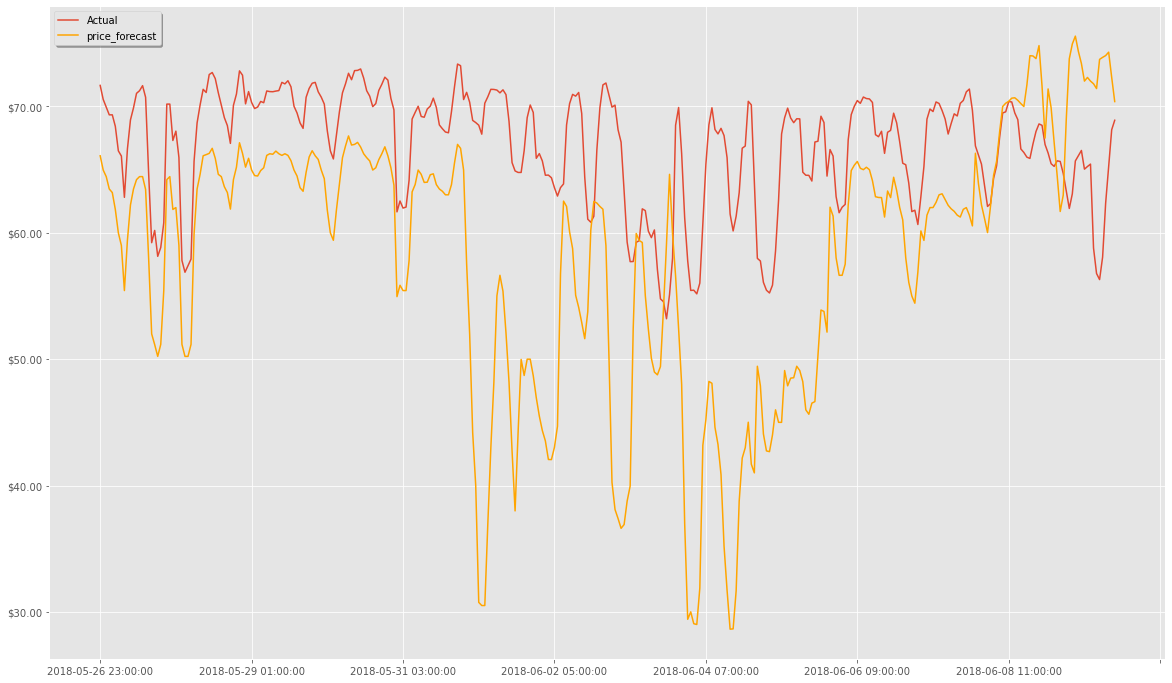

In [107]:
#Read in model_performance to capture metrics
from TimeSeriesStats import model_performance

#Capture predictions
predictions = price_test.values
actual = X_test['price actual'].values

#Evaluate price preditions
print(model_performance(predictions, actual))

#Plot predictions against actual
from TimeseriesPlotter import timeseries_plot

#Create fig
f, ax = plt.subplots(figsize = (20,12))

#Plot original data
timeseries_plot(X_test['price actual'][:24*14],title='Evaluating Original Price Predictions\n' ,label = 'Actual', ax = ax)

timeseries_plot(price_test[:24*14], color = 'orange', label = 'Predictions', ax = ax, legend = True)

###Set plot aesthetics###
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))));

### Build Base Model - Persistence Model Forecast

**Build Persistence Model**

In [108]:
history = [value for value in X_test['price actual'].values]


In [110]:
#Build forecast
history = [value for value in X_train['price actual'].values]
predictions = []

for i in range(len(actual)):
    predictions.append(history[-1])
    history.append(actual[i])

**Evaluate fit and performance**

In [111]:
persistence_model_predictions = pd.DataFrame(predictions,)
persistence_model_predictions.columns = ['predictions']

persistence_model_predictions


,predictions
0,72.03
1,71.67
2,70.56
3,69.96
4,69.34
...,...
5255,77.61
5256,77.02
5257,76.16
5258,74.30


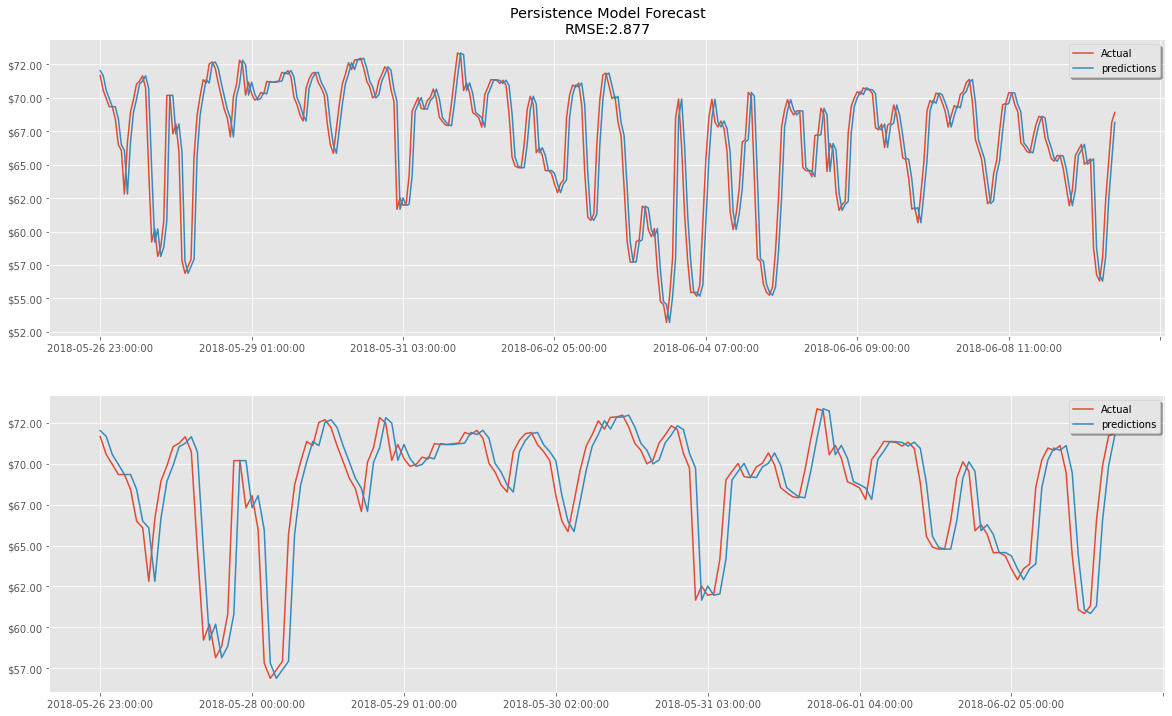

In [112]:
#Create fig
f, ax = plt.subplots(2,1,figsize = (20,12))

#Evaluate base model and store as metrics
metrics= model_performance(predictions,actual)

#Plot data 2 week zoom
timeseries_plot(X_test['price actual'][:24*14], ax=ax[0], label = 'Actual')
timeseries_plot(persistence_model_predictions[:24*14], ax=ax[0], label = 'Predictions', legend=True)

#Plot data 1 week zoom
timeseries_plot(X_test['price actual'][:24*7], ax=ax[1], label = 'Actual')
timeseries_plot(persistence_model_predictions[:24*7], ax=ax[1], label = 'Predictions', legend=True)

###Set plot aesthetics###
ax[0].set_title('Persistence Model Forecast\nRMSE:{}'.format(round(metrics['RMSE'],3)))

ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))


### Univariate Analysis

#### Prepare Data

In [ ]:
#Subset Target in training_data
X_train_univariate = X_train['price actual differenced']


Build Smoothing model that accomodates Seasonality

Build ARIMA Model

Tree MEthod(only after LSTM)

### Multivariate Analysis - Deep Learning

#### Prepare Data

In [ ]:
#Format Data for single step LSTM Model

**Select order of P for VAR Model

In [87]:
#Read in and init VARMAX
from statsmodels.tsa.api import VAR

model = VAR(X_train)


# for p in list(range(1,10)):
#     result = model.fit(p)
#     print('Lag Order: ', p)
#     print('Model Stats: \nAIC:{}\nBIC:{}\nFPE:{}\nHQIC:'.format(result.aic, result.bic, 
#                                                                 result.fpe, result.hqic))
#     print('============================================')

In [88]:
model.select_order(maxlags=24).summary()

,AIC,BIC,FPE,HQIC
0,52.12,52.12,4.327e+22,52.12
1,51.85,51.85,3.284e+22,51.85
2,51.81,51.82,3.158e+22,51.81
3,51.79,51.81,3.090e+22,51.79
4,51.77,51.80,3.034e+22,51.78
5,51.75,51.79,2.986e+22,51.76
6,51.74,51.78,2.943e+22,51.75
7,51.72,51.77,2.907e+22,51.74
8,51.72,51.77,2.883e+22,51.73
9,51.71,51.77,2.859e+22,51.73


In [89]:
model_fitted = model.fit(24, )


#https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
#granger causility tes


**Check residuals**

In [90]:
#Import durbin_watson
from statsmodels.stats.stattools import durbin_watson

#Init durbin_watson and get serial correlation results
serial_corr = durbin_watson(model_fitted.resid)

#View results
for col,value in zip(X_train.columns, serial_corr):
    print(col, 'DW Statistic:', round(value,3))

generation fossil gas differenced DW Statistic: 1.868
generation fossil hard coal differenced DW Statistic: 1.96
generation hydro pumped storage consumption differenced DW Statistic: 1.878
price actual differenced DW Statistic: 1.937
total load actual differenced DW Statistic: 1.919


**Forecast Predictions w/ VAR**

In [91]:
#Apply lag to X_train
lag_order = model_fitted.k_ar
var_input_data = X_train.values[-lag_order:]

In [92]:
forecast = model_fitted.forecast(var_input_data, steps = len(X_test))

In [93]:
#Create a dataframe of forecast values
df_forecast = pd.DataFrame(forecast, index=X_test.index[-len(X_test):], columns=X_test.columns)

df_forecast

,generation fossil gas,generation fossil hard coal,generation hydro pumped storage consumption,price actual,total load actual
date_time,,,,,
2018-05-26 23:00:00,-109.761981,-40.473857,-19.982786,-0.339707,-90.281158
2018-05-27 00:00:00,-523.035133,37.561793,-3.506415,0.417873,-137.146840
2018-05-27 01:00:00,-195.199802,-46.302388,101.999106,0.532972,-122.498740
2018-05-27 02:00:00,-57.774902,-70.692130,13.488893,-0.578682,-339.325760
2018-05-27 03:00:00,118.918602,-104.205455,131.784982,-0.039205,-163.540952
...,...,...,...,...,...
2018-12-31 19:00:00,0.009049,-0.031678,-0.004210,0.000171,0.062664
2018-12-31 20:00:00,0.009049,-0.031678,-0.004210,0.000171,0.062664
2018-12-31 21:00:00,0.009049,-0.031678,-0.004210,0.000171,0.062664


**Plot Forecasts to see fit**

In [48]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [100]:
predictions = pd.DataFrame()
predictions['var_forecast'] = df_forecast['price actual']
predictions['actual'] = X_test['price actual']
#predictions['forecast_converted'] = predictions['var_forecast'].cumsum() + predictions['actual'].iloc[-1]
predictions['forecast_converted'] = predictions['var_forecast'].cumsum() + predictions['actual'].iloc[-24]+ predictions['var_forecast'].iloc[-1]

predictions.head(15)

,var_forecast,actual,forecast_converted
date_time,,,
2018-05-26 23:00:00,-0.339707,71.67,68.060464
2018-05-27 00:00:00,0.417873,70.56,68.478337
2018-05-27 01:00:00,0.532972,69.96,69.011309
2018-05-27 02:00:00,-0.578682,69.34,68.432628
2018-05-27 03:00:00,-0.039205,69.34,68.393423
2018-05-27 04:00:00,-0.417782,68.43,67.975640
2018-05-27 05:00:00,-0.660222,66.49,67.315418
2018-05-27 06:00:00,-0.491631,66.08,66.823787
2018-05-27 07:00:00,-0.085353,62.81,66.738434


{'MAE': 6.2542242684005185,
 'MAPE': 0.09484041484472572,
 'MSE': 62.36483836429771,
 'RMSE': 7.897141151346967}

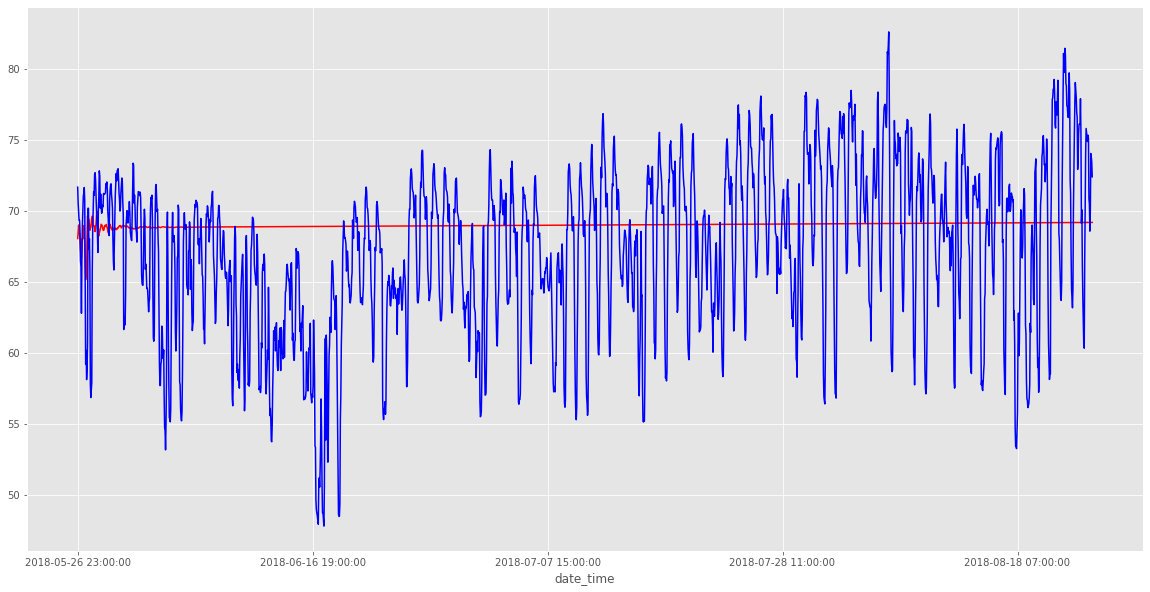

In [101]:
f, ax = plt.subplots(figsize = (20,10))

predictions['forecast_converted'][:24*90].plot(ax=ax, color = 'r')
predictions['actual'][:24*90].plot(ax=ax, color = 'b')

model_performance(predictions['forecast_converted'].values, predictions['actual'].values)

**Evaluate Metrics**

### Build LSTM model

**Prepare data**